# IBM HR Analytics Challenge

## 1. Data Preparation

In [82]:
import pandas as pd
ibm = pd.read_csv("IBM_Employee_Attrition_Data.csv")
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [72]:
ibm.shape

(1470, 35)

In [73]:
def label_encoder(df):
    labels = {"Yes": 0, "No":1}
    df.replace(labels, inplace=True)
label_encoder(ibm["Attrition"],) 

In [74]:
ibm["Attrition"].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

In [148]:
ibm_attrition = ibm["Attrition"]
ibm_data = ibm.drop(columns="Attrition", axis=1,)
ibm_data.shape

(1470, 34)

In [85]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

## 2. Data Clearning

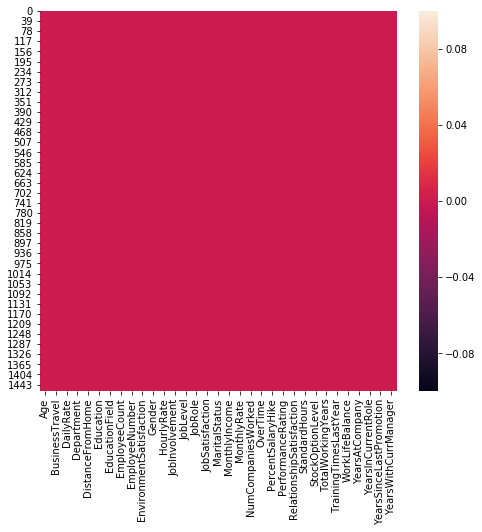

In [169]:
# check missing value
plt.figure(figsize=(8,7))
sns.heatmap(ibm_data.isnull())
plt.show();

## 3. Feature Engineering

### 3-1. Feature Selection

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
ibm_data["MonthlyIncome"].dtypes

dtype('int64')

In [121]:
# low variance

cols = list(ibm_data.columns)
numeric_cols = []
not_numeric_cols = []

for col in cols:
    if ibm_data[col].dtypes == "int64":
        numeric_cols.append(col)
    else:
        not_numeric_cols.append(col)

numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [122]:
not_numeric_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [127]:
ibm_data[not_numeric_cols].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [145]:
nn_col_dict = {}
len_nn_col = {}
for key in not_numeric_cols:
    value = ibm_data[key].value_counts()
    nn_col_dict[key] = value
    len_nn_col[key] = len(value)

print(len_nn_col)
print("-----------------------------------------")
print(nn_col_dict)

{'Gender': 2, 'MaritalStatus': 3, 'JobRole': 9, 'Over18': 1, 'BusinessTravel': 3, 'EducationField': 6, 'Department': 3, 'OverTime': 2}
-----------------------------------------
{'Gender': Male      882
Female    588
Name: Gender, dtype: int64, 'MaritalStatus': Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64, 'JobRole': Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64, 'Over18': Y    1470
Name: Over18, dtype: int64, 'BusinessTravel': Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64, 'EducationField': Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
H

In [149]:
# columns = "over18" is only one value. so drop it
ibm_data.drop("Over18", axis=1, inplace=True)
ibm_data.shape

(1470, 33)

In [156]:
# columns = "Gender" and "OverTime" are binary
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()

binary_cols = ["Gender", "OverTime"]
for col in binary_cols:
    binarizer.fit_transform(ibm_data[col])

In [159]:
# columns = "Gender" and "OverTime" are binary
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
gender = binarizer.fit_transform(ibm_data["Gender"])
overtime = binarizer.fit_transform(ibm_data["OverTime"])

In [165]:
ibm_data["Gender"] = gender
ibm_data["OverTime"] = overtime
ibm_data[["Gender", "OverTime"]].head()

,Gender,OverTime
0,0,1
1,1,0
2,1,1
3,0,1
4,1,0


In [176]:
# columns = 'BusinessTravel': 3 is sequential category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
businesstravel = le.fit_transform(ibm_data["BusinessTravel"])
ibm_data["BusinessTravel"] = businesstravel
ibm_data["BusinessTravel"].tail(7)

1463    0
1464    2
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, dtype: int64

In [186]:
ibm_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 'MaritalStatus': 3, 'JobRole': 9, 'EducationField': 6, 'Department': 3 are independent categories

In [222]:
ohe = OneHotEncoder()
# 2d error was solved by making DataFrame
educationfield = ohe.fit_transform(pd.DataFrame(ibm_data["EducationField"])).toarray()
educationfield

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [228]:
ibm_educationfield = pd.DataFrame(educationfield, columns=["Human Resources", "Life Sciences", "Marketing", "Medical", "Other", "Technical Degree" ])
ibm_educationfield.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [229]:
ibm_educationfield.sum()

Human Resources      27.0
Life Sciences       606.0
Marketing           159.0
Medical             464.0
Other                82.0
Technical Degree    132.0
dtype: float64

In [ ]:
ibm_data["JobRole"] = ibm_data["JobRole"].astype("int", categories=["Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director", "Healthcare Representative", "Manager", "Sales Representative", "Research Director", "Human Resources"])

In [214]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
# 2d error was solved by making DataFrame
jobrole = ohe.fit_transform(pd.DataFrame(ibm_data["JobRole"])).toarray()
jobrole

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [216]:
ibm_jobrole = pd.DataFrame(jobrole, columns=["Research Director", "Sales Representative", "Laboratory Technician", "Healthcare Representative", "Sales Executive", "Manufacturing Director", "Human Resources",  "Manager",  "Research Scientist" ])
ibm_jobrole.head()

,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Human Resources
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Research Director            326.0
Sales Representative         292.0
Laboratory Technician        259.0
Healthcare Representative    145.0
Sales Executive              131.0
Manufacturing Director       102.0
Human Resources               83.0
Manager                       80.0
Research Scientist            52.0

In [ ]:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52

In [230]:
ibm_jobrole.sum()

Sales Executive              131.0
Research Scientist            52.0
Laboratory Technician        259.0
Manufacturing Director       102.0
Healthcare Representative    145.0
Manager                       80.0
Sales Representative         292.0
Research Director            326.0
Human Resources               83.0
dtype: float64

In [217]:
ibm_data.shape

(1470, 33)

In [218]:
ibm_data.drop("JobRole", axis=1, inplace=True)
ibm_data.shape

(1470, 32)

In [219]:
ibm_data = pd.concat([ibm_data, ibm_jobrole], axis=1)
ibm_data.shape

(1470, 41)

In [220]:
len(numeric_cols)

26

In [112]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = (0.8 * (1 - 0.8)))
sel_ibm_data = sel.fit_transform(ibm_data[numeric_cols])
print("---- The number of columns ----")
print("Before checking variance:", len(numeric_cols))
print("After cut-off columns with low variance:", sel_ibm_data.shape[1])

---- The number of columns ----
Before checking variance: 26
After cut-off columns with low variance: 23


In [77]:
ibm_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

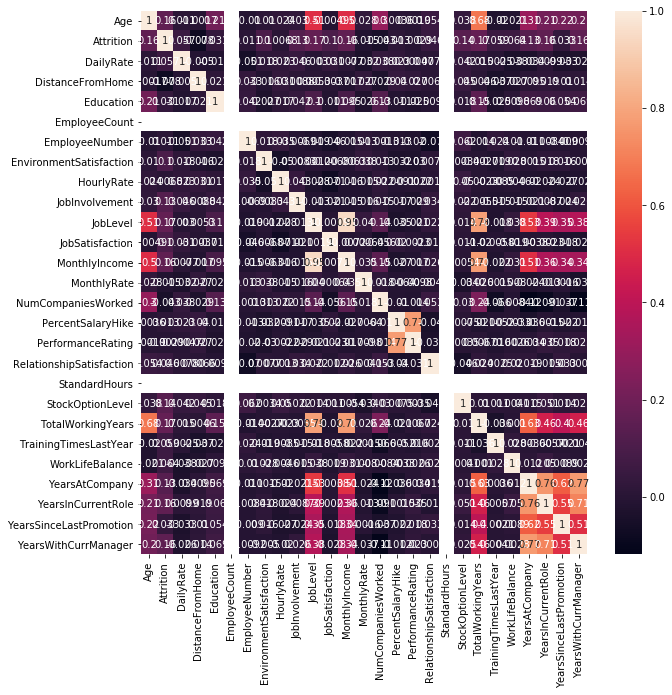

In [78]:
cor = ibm.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show();

In [51]:
cor.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [81]:
# Definition of high cor features: cor is more than 0.1(abs)
cor.head(2)
cor_columns_se = list(cor.columns)
high_correlation = []

for col in cor_columns_se:
    if col == "Attrition":
        continue
    elif cor.loc["Attrition", col] >= 0.1 or  -0.1 >=  cor.loc["Attrition", col]:
        high_correlation.append(col)

high_correlation

['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [114]:
print("The number of columns with high correlation with Attrition:", len(high_correlation))

The number of columns with high correlation with Attrition: 11


### 3-1. Feature Extraction

In [117]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_ibm_data = pca.fit_transform(ibm_data)

ValueError: could not convert string to float: 'Travel_Rarely'